#### Import Libraries and Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

In [2]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Portofolio/Telco Customer Churn/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Data Preprocessing

In [3]:
df.shape

(7043, 21)

In [4]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convert data type of TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [6]:
# Convert data type of SeniorCitizen column
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df['SeniorCitizen'].dtypes

dtype('O')

In [7]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [8]:
df.describe(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
# Check the missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Remove the missing values in the 'TotalCharges' column
# This is because 'TotalCharges' is a critical feature for analysis/modeling, and we can't accurately predict churn without it
# By removing these rows, we ensure that our model is trained on complete and reliable data
df.dropna(subset=['TotalCharges'], inplace=True)

In [11]:
new_df=df.copy()

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# Check the unique values
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [14]:
# Check duplicates
df.duplicated().sum()

0

In [15]:
# Remove the 'customerID' column from the DataFrame
df.drop(['customerID'], axis=1, inplace=True)

In [16]:
df.shape

(7032, 20)

In [17]:
# Unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
# Remove (automatic) from PaymentMethod elements
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [19]:
# Unique elements of the InternetService column
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
# Unique elements of the Contract column
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

#### Exploratory Data Analysis

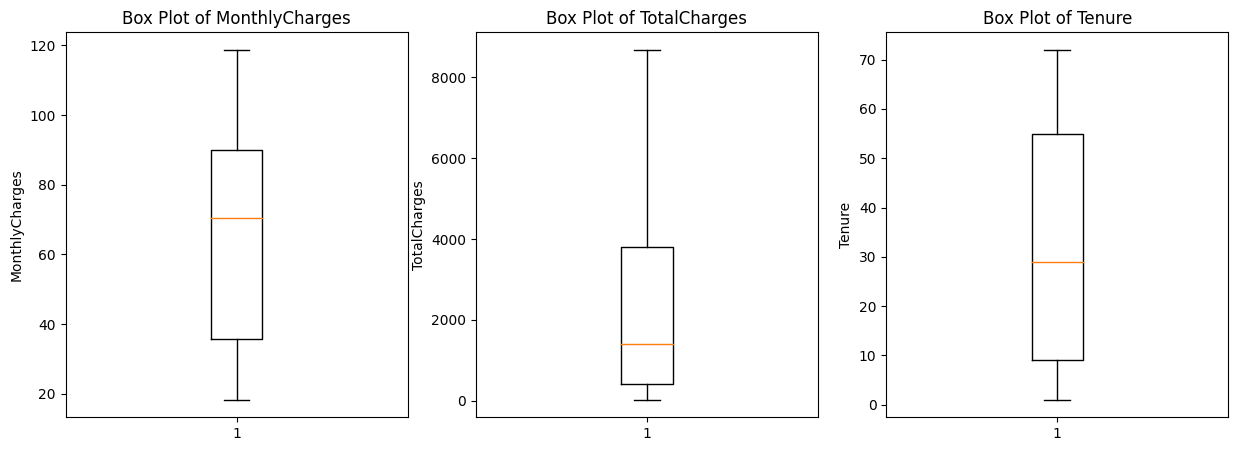

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Check the outliers of MonthlyCharges
axs[0].boxplot(df['MonthlyCharges'])
axs[0].set_title('Box Plot of MonthlyCharges')
axs[0].set_ylabel('MonthlyCharges')

# Check the outliers of TotalCharges
axs[1].boxplot(df['TotalCharges'])
axs[1].set_title('Box Plot of TotalCharges')
axs[1].set_ylabel('TotalCharges')

# Check the outliers of Tenure
axs[2].boxplot(df['tenure'])
axs[2].set_title('Box Plot of Tenure')
axs[2].set_ylabel('Tenure')

plt.show()

Churn
No     5163
Yes    1869
Name: count, dtype: int64
 


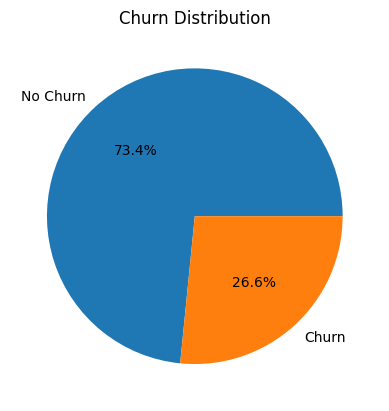

In [22]:
# Print the count of each unique value in the 'Churn' column
print(df.Churn.value_counts())
print(" ")

# Calculate the percentage of each class in the 'Churn' column
labels = ['No Churn', 'Churn']
sizes = df['Churn'].value_counts()
percentages = (sizes / sizes.sum() * 100).round(2).astype('str') + '%'

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

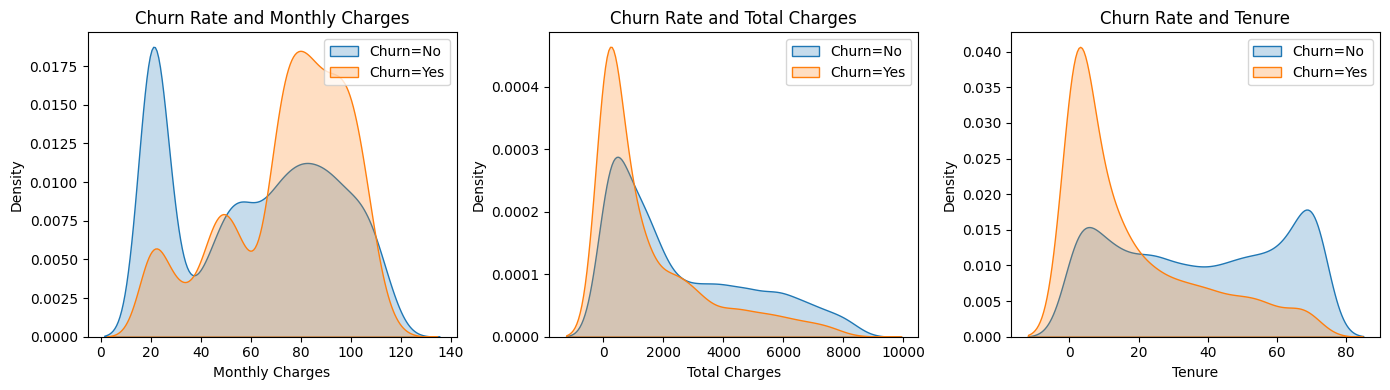

In [23]:
# Create a figure with 3 subplots, each with a different x-axis variable
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
# Loop through each unique value in the 'Churn' column
for i, churn_value in enumerate(df['Churn'].unique()):
    # Subset the data for the current churn value
    subset_data = df[df['Churn'] == churn_value]

    # Plot the KDE of MonthlyCharges for the current churn value
    sns.kdeplot(data=subset_data, x='MonthlyCharges', fill=True, ax=axes[0], label=f'Churn={churn_value}')
    axes[0].set_title('Churn Rate and Monthly Charges')
    axes[0].set_xlabel('Monthly Charges')
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Plot the KDE of TotalCharges for the current churn value
    sns.kdeplot(data=subset_data, x='TotalCharges', fill=True, ax=axes[1], label=f'Churn={churn_value}')
    axes[1].set_title('Churn Rate and Total Charges')
    axes[1].set_xlabel('Total Charges')
    axes[1].set_ylabel('Density')
    axes[1].legend()

    # Plot the KDE of tenure for the current churn value
    sns.kdeplot(data=subset_data, x='tenure', fill=True, ax=axes[2], label=f'Churn={churn_value}')
    axes[2].set_title('Churn Rate and Tenure')
    axes[2].set_xlabel('Tenure')
    axes[2].set_ylabel('Density')
    axes[2].legend()

plt.tight_layout()
plt.show()

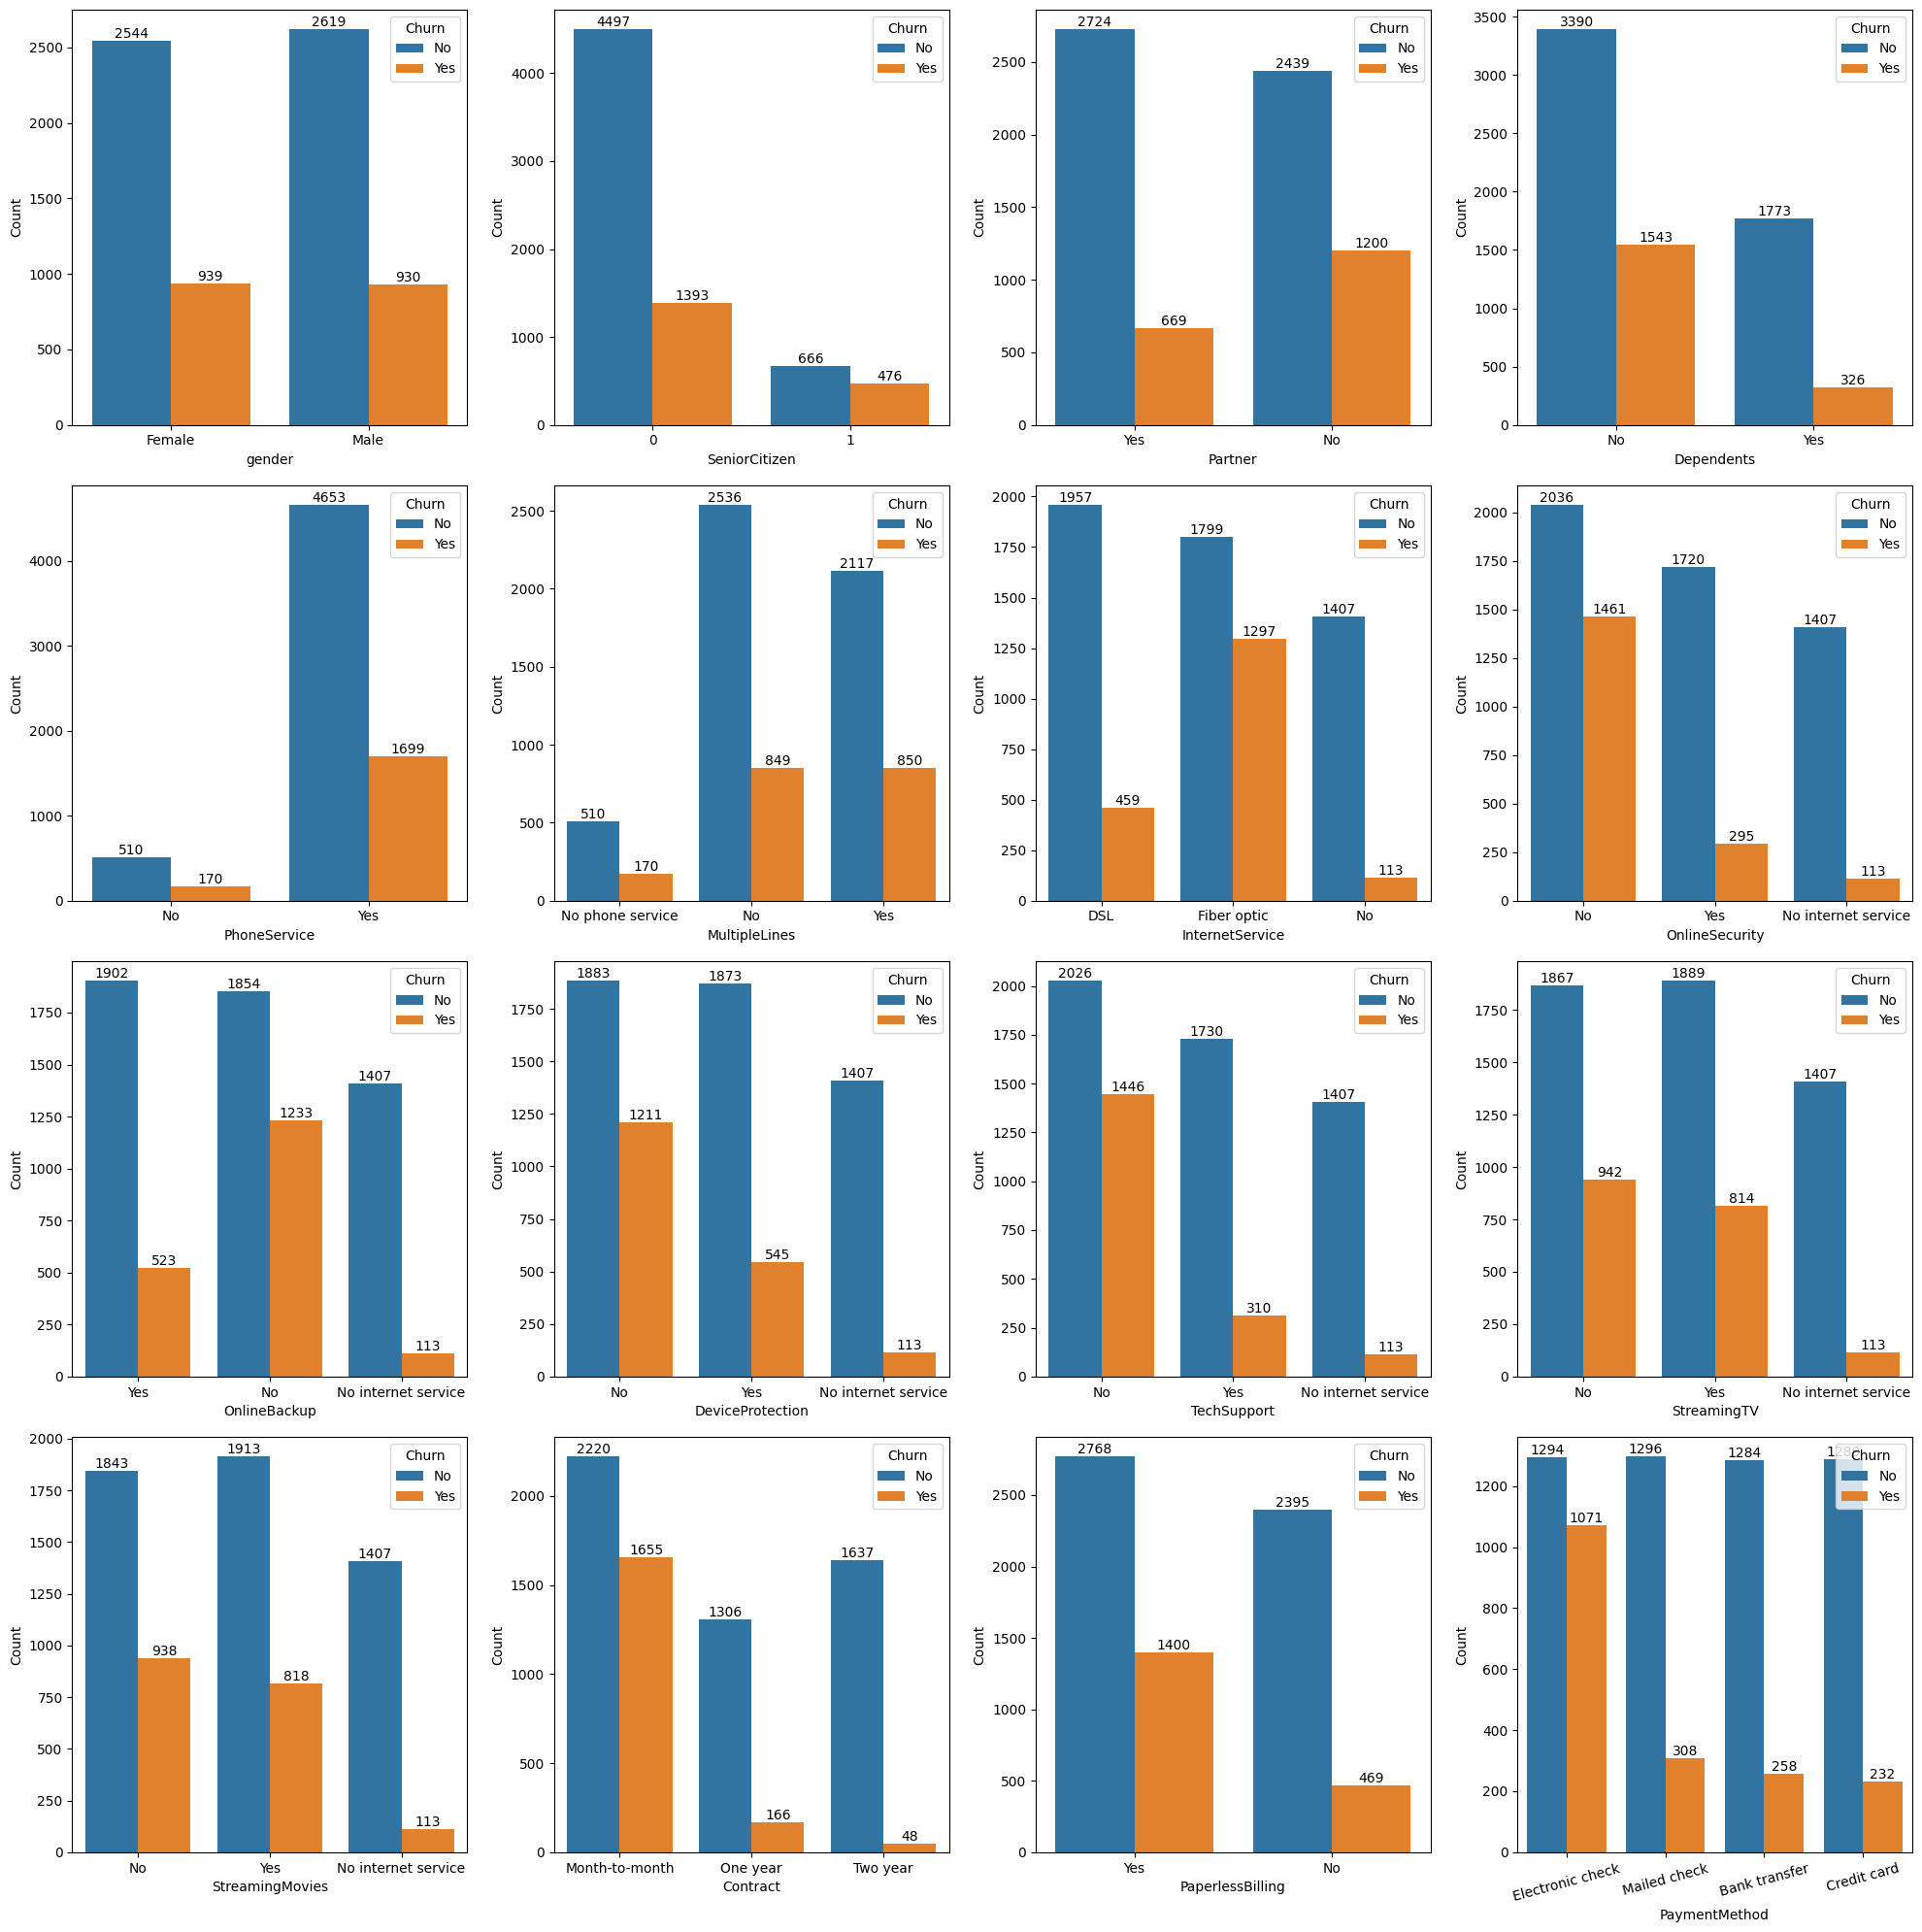

In [24]:
# Create a figure
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Get a list of categorical columns (excluding 'Churn')
categorical = [col for col in df.select_dtypes(include=['object']).columns if col != 'Churn']
rotate = 'PaymentMethod'

# Loop through each categorical column
for ax, col in zip(axes.flat, categorical):
    sns.countplot(x=col, hue='Churn', data=df, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    if col == rotate:
        ax.tick_params(axis='x', rotation=15)
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

In [25]:
# Label encoding
categorical = df.select_dtypes(include=['object']).columns
for cat in categorical:
    if cat != 'Churn':
        df[cat] = LabelEncoder().fit_transform(df[cat])

In [26]:
# Convert 'Churn' to binary
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

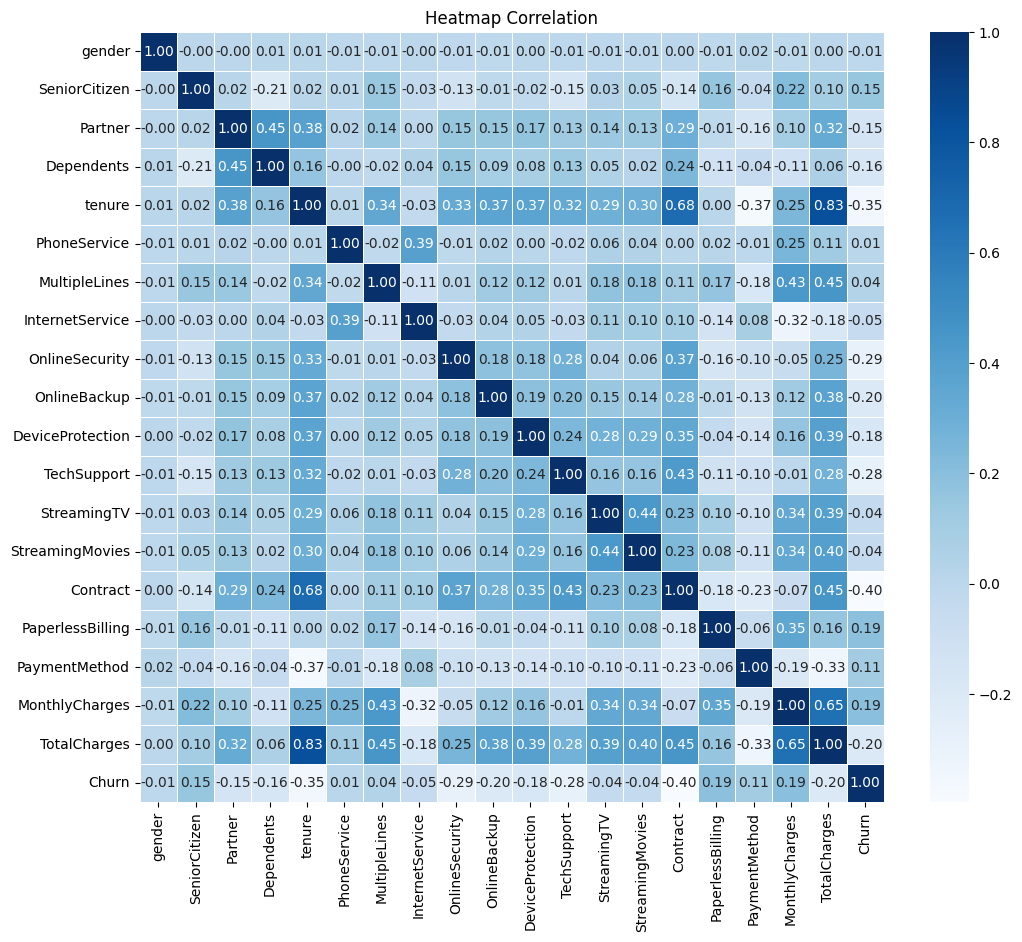

In [27]:
# Calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

#### Model Prediction

In [28]:
# Separate the features from the target variable
feature = df.drop('Churn', axis=1)
target = df['Churn']

# Use SMOTE to oversample the minority class (Churn=1) to balance the dataset
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(feature, target)

# Divide the data into training group and test group
feature_churn_train, feature_churn_test, target_churn_train, target_churn_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

In [29]:
# Convert the training feature and target to a NumPy array
x_churn_train = feature_churn_train.to_numpy()
y_churn_train = target_churn_train.to_numpy().ravel()

# Convert the test feature and target to a NumPy array
x_churn_test = feature_churn_test.to_numpy()
y_churn_test = target_churn_test.to_numpy().ravel()

###### LogisticRegression

In [30]:
# Define the model
logreg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

# Fit the model to the training data
logreg.fit(x_churn_train, y_churn_train)

LogisticRegression(solver='liblinear')

In [31]:
y_predict_logreg = logreg.predict(x_churn_test)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_churn_test, y_predict_logreg)
logreg_precision = precision_score(y_churn_test, y_predict_logreg)
logreg_recall = recall_score(y_churn_test, y_predict_logreg)
logreg_f1 = f1_score(y_churn_test, y_predict_logreg)
print(f'Accuracy: {logreg_accuracy:.4f}')
print(f'Precision: {logreg_precision:.2f}')
print(f'Recall: {logreg_recall:.2f}')
print(f'F1 Score: {logreg_f1:.2f}')

Accuracy: 0.8089
Precision: 0.78
Recall: 0.85
F1 Score: 0.82


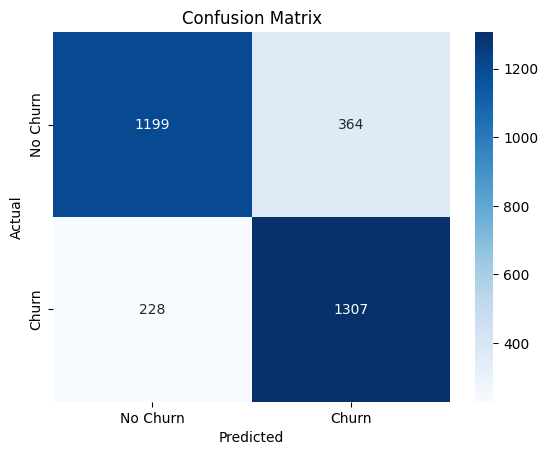

In [32]:
# Plot confusion matrix
cm = confusion_matrix(y_churn_test, y_predict_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(logreg, x_res, y_res, cv=5, scoring=scoring)

logreg_mean_accuracy = np.mean(cv_results['test_accuracy'])
logreg_std_accuracy = np.std(cv_results['test_accuracy'])
logreg_mean_precision = np.mean(cv_results['test_precision'])
logreg_std_precision = np.std(cv_results['test_precision'])
logreg_mean_recall = np.mean(cv_results['test_recall'])
logreg_std_recall = np.std(cv_results['test_recall'])
logreg_mean_f1 = np.mean(cv_results['test_f1'])
logreg_std_f1 = np.std(cv_results['test_f1'])

print(f'Cross-validation accuracy: {logreg_mean_accuracy:.4f} ± {logreg_std_accuracy:.4f}')
print(f'Cross-validation precision: {logreg_mean_precision:.4f} ± {logreg_std_precision:.4f}')
print(f'Cross-validation recall: {logreg_mean_recall:.4f} ± {logreg_std_recall:.4f}')
print(f'Cross-validation F1-score: {logreg_mean_f1:.4f} ± {logreg_std_f1:.4f}')

Cross-validation accuracy: 0.7972 ± 0.0389
Cross-validation precision: 0.7798 ± 0.0104
Cross-validation recall: 0.8272 ± 0.0960
Cross-validation F1-score: 0.8004 ± 0.0499


In [34]:
print(classification_report(y_churn_test, y_predict_logreg))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1563
           1       0.78      0.85      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



###### RandomForestClassifier

In [35]:
# Define the model
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
rfc.fit(x_churn_train, y_churn_train)

RandomForestClassifier(max_depth=5)

In [36]:
y_predict_rfc = rfc.predict(x_churn_test)

# Calculate evaluation metrics
rfc_accuracy = accuracy_score(y_churn_test, y_predict_rfc)
rfc_precision = precision_score(y_churn_test, y_predict_rfc)
rfc_recall = recall_score(y_churn_test, y_predict_rfc)
rfc_f1 = f1_score(y_churn_test, y_predict_rfc)
print(f'Accuracy: {rfc_accuracy:.4f}')
print(f'Precision: {rfc_precision:.2f}')
print(f'Recall: {rfc_recall:.2f}')
print(f'F1 Score: {rfc_f1:.2f}')

Accuracy: 0.8070
Precision: 0.77
Recall: 0.87
F1 Score: 0.82


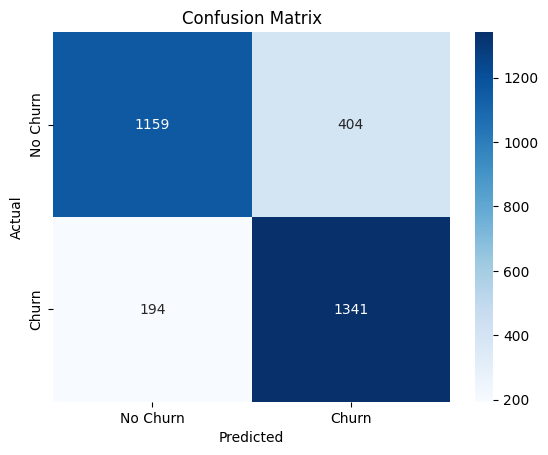

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_churn_test, y_predict_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(rfc, x_res, y_res, cv=5, scoring=scoring)

rfc_mean_accuracy = np.mean(cv_results['test_accuracy'])
rfc_std_accuracy = np.std(cv_results['test_accuracy'])
rfc_mean_precision = np.mean(cv_results['test_precision'])
rfc_std_precision = np.std(cv_results['test_precision'])
rfc_mean_recall = np.mean(cv_results['test_recall'])
rfc_std_recall = np.std(cv_results['test_recall'])
rfc_mean_f1 = np.mean(cv_results['test_f1'])
rfc_std_f1 = np.std(cv_results['test_f1'])

print(f'Cross-validation accuracy: {rfc_mean_accuracy:.4f} ± {rfc_std_accuracy:.4f}')
print(f'Cross-validation precision: {rfc_mean_precision:.4f} ± {rfc_std_precision:.4f}')
print(f'Cross-validation recall: {rfc_mean_recall:.4f} ± {rfc_std_recall:.4f}')
print(f'Cross-validation F1-score: {rfc_mean_f1:.4f} ± {rfc_std_f1:.4f}')

Cross-validation accuracy: 0.8011 ± 0.0383
Cross-validation precision: 0.7790 ± 0.0130
Cross-validation recall: 0.8402 ± 0.0970
Cross-validation F1-score: 0.8059 ± 0.0487


In [39]:
print(classification_report(y_churn_test, y_predict_rfc))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1563
           1       0.77      0.87      0.82      1535

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



###### DecisionTreeClassifier

In [40]:
# Define the model
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_churn_train, y_churn_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
y_predict_dtc = dtc.predict(x_churn_test)

# Calculate evaluation metrics
dtc_accuracy = accuracy_score(y_churn_test, y_predict_dtc)
dtc_precision = precision_score(y_churn_test, y_predict_dtc)
dtc_recall = recall_score(y_churn_test, y_predict_dtc)
dtc_f1 = f1_score(y_churn_test, y_predict_dtc)
print(f'Accuracy: {dtc_accuracy:.4f}')
print(f'Precision: {dtc_precision:.2f}')
print(f'Recall: {dtc_recall:.2f}')
print(f'F1 Score: {dtc_f1:.2f}')

Accuracy: 0.7954
Precision: 0.76
Recall: 0.86
F1 Score: 0.81


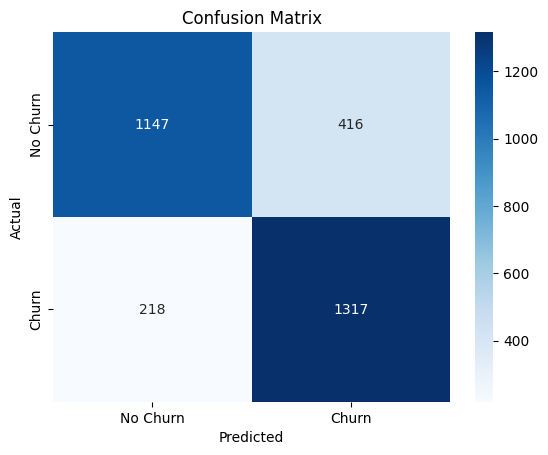

In [42]:
# Plot confusion matrix
cm = confusion_matrix(y_churn_test, y_predict_dtc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(dtc, x_res, y_res, cv=5, scoring=scoring)

dtc_mean_accuracy = np.mean(cv_results['test_accuracy'])
dtc_std_accuracy = np.std(cv_results['test_accuracy'])
dtc_mean_precision = np.mean(cv_results['test_precision'])
dtc_std_precision = np.std(cv_results['test_precision'])
dtc_mean_recall = np.mean(cv_results['test_recall'])
dtc_std_recall = np.std(cv_results['test_recall'])
dtc_mean_f1 = np.mean(cv_results['test_f1'])
dtc_std_f1 = np.std(cv_results['test_f1'])

print(f'Cross-validation accuracy: {dtc_mean_accuracy:.4f} ± {dtc_std_accuracy:.4f}')
print(f'Cross-validation precision: {dtc_mean_precision:.4f} ± {dtc_std_precision:.4f}')
print(f'Cross-validation recall: {dtc_mean_recall:.4f} ± {dtc_std_recall:.4f}')
print(f'Cross-validation F1-score: {dtc_mean_f1:.4f} ± {dtc_std_f1:.4f}')

Cross-validation accuracy: 0.7800 ± 0.0500
Cross-validation precision: 0.7600 ± 0.0156
Cross-validation recall: 0.8160 ± 0.1252
Cross-validation F1-score: 0.7827 ± 0.0677


In [44]:
print(classification_report(y_churn_test, y_predict_dtc))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1563
           1       0.76      0.86      0.81      1535

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.79      3098
weighted avg       0.80      0.80      0.79      3098



###### XGBClassifier

In [45]:
# Define the model
xgb = XGBClassifier(n_estimators=100, max_depth=5)
xgb.fit(x_churn_train, y_churn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_predict_xgb = xgb.predict(x_churn_test)

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_churn_test, y_predict_xgb)
xgb_precision = precision_score(y_churn_test, y_predict_xgb)
xgb_recall = recall_score(y_churn_test, y_predict_xgb)
xgb_f1 = f1_score(y_churn_test, y_predict_xgb)
print(f'Accuracy: {xgb_accuracy:.4f}')
print(f'Precision: {xgb_precision:.2f}')
print(f'Recall: {xgb_recall:.2f}')
print(f'F1 Score: {xgb_f1:.2f}')

Accuracy: 0.8338
Precision: 0.83
Recall: 0.84
F1 Score: 0.83


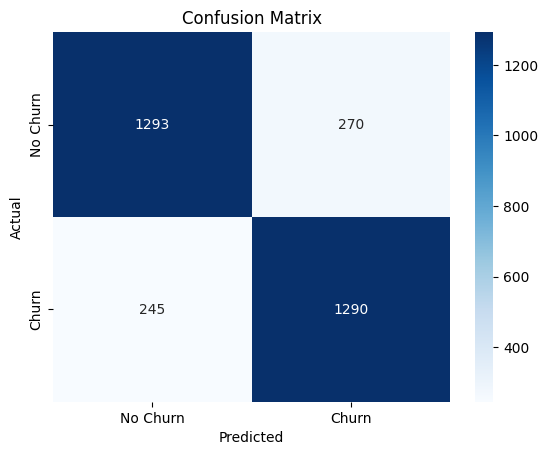

In [47]:
# Plot confusion matrix
cm = confusion_matrix(y_churn_test, y_predict_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb, x_res, y_res, cv=5, scoring=scoring)

xgb_mean_accuracy = np.mean(cv_results['test_accuracy'])
xgb_std_accuracy = np.std(cv_results['test_accuracy'])
xgb_mean_precision = np.mean(cv_results['test_precision'])
xgb_std_precision = np.std(cv_results['test_precision'])
xgb_mean_recall = np.mean(cv_results['test_recall'])
xgb_std_recall = np.std(cv_results['test_recall'])
xgb_mean_f1 = np.mean(cv_results['test_f1'])
xgb_std_f1 = np.std(cv_results['test_f1'])

print(f'Cross-validation accuracy: {xgb_mean_accuracy:.4f} ± {xgb_std_accuracy:.4f}')
print(f'Cross-validation precision: {xgb_mean_precision:.4f} ± {xgb_std_precision:.4f}')
print(f'Cross-validation recall: {xgb_mean_recall:.4f} ± {xgb_std_recall:.4f}')
print(f'Cross-validation F1-score: {xgb_mean_f1:.4f} ± {xgb_std_f1:.4f}')

Cross-validation accuracy: 0.8320 ± 0.0808
Cross-validation precision: 0.8365 ± 0.0126
Cross-validation recall: 0.8239 ± 0.1947
Cross-validation F1-score: 0.8182 ± 0.1089


In [49]:
print(classification_report(y_churn_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1563
           1       0.83      0.84      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



In [50]:
# Define the models
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5),
    LogisticRegression(C=1.0, penalty='l2', solver='liblinear'),
    DecisionTreeClassifier(max_depth=5),
    XGBClassifier(n_estimators=100, max_depth=5)
]

# Define the scoring metrics for cross-validation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Train and evaluate each model with cross-validation
results = []
for model in models:
    scores = cross_validate(model, x_churn_train, y_churn_train, cv=5, scoring=scoring_metrics)
    accuracy_scores = scores['test_accuracy']
    precision_scores = scores['test_precision_macro']
    recall_scores = scores['test_recall_macro']
    f1_scores = scores['test_f1_macro']

    # Compute the class validation metrics using the last fold
    model.fit(x_churn_train, y_churn_train)
    y_pred_val = model.predict(x_churn_test)
    report = classification_report(y_churn_test, y_pred_val, output_dict=True)
    matrix = confusion_matrix(y_churn_test, y_pred_val)
    accuracy = accuracy_score(y_churn_test, y_pred_val)
    recall = recall_score(y_churn_test, y_pred_val, average='macro')
    precision = precision_score(y_churn_test, y_pred_val, average='macro')
    f1 = f1_score(y_churn_test, y_pred_val, average='macro')

    results.append((model.__class__.__name__,
                     accuracy_scores.mean(), accuracy_scores.std() * 2,
                     precision_scores.mean(), precision_scores.std() * 2,
                     recall_scores.mean(), recall_scores.std() * 2,
                     f1_scores.mean(), f1_scores.std() * 2,
                     report, matrix))

# Print the results
for name, accuracy_mean, accuracy_std, precision_mean, precision_std, recall_mean, recall_std, f1_mean, f1_std, report, matrix in results:
    print(f"{name} validation metrics:")
    print(f"Accuracy: {accuracy_mean:.3f} ± {accuracy_std:.3f}")
    print(f"Precision: {precision_mean:.3f} ± {precision_std:.3f}")
    print(f"Recall: {recall_mean:.3f} ± {recall_std:.3f}")
    print(f"F1 Score: {f1_mean:.3f} ± {f1_std:.3f}")
    print(f"Classification Report:\n{classification_report(y_churn_test, y_pred_val)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_churn_test, y_pred_val)}\n")

RandomForestClassifier validation metrics:
Accuracy: 0.808 ± 0.020
Precision: 0.813 ± 0.019
Recall: 0.808 ± 0.020
F1 Score: 0.807 ± 0.020
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1563
           1       0.83      0.84      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

Confusion Matrix:
[[1293  270]
 [ 245 1290]]

LogisticRegression validation metrics:
Accuracy: 0.805 ± 0.020
Precision: 0.807 ± 0.021
Recall: 0.805 ± 0.020
F1 Score: 0.804 ± 0.020
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1563
           1       0.83      0.84      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83    

In [51]:
res = []
for model in models:
    model.fit(x_churn_train, y_churn_train)
    y_pred = model.predict(x_churn_test)

    accuracy = accuracy_score(y_churn_test, y_pred)
    report = classification_report(y_churn_test, y_pred, output_dict=True)
    matrix = confusion_matrix(y_churn_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']

    res.append({
        "Model": model.__class__.__name__,
        "Accuracy": f"{accuracy:.3f}",
        "Precision": f"{precision:.3f}",
        "Recall": f"{recall:.3f}",
        "F1 Score": f"{f1:.3f}"
    })

# Create a Pandas DataFrame from the results
table = pd.DataFrame(res)
table

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.809,0.814,0.809,0.808
1,LogisticRegression,0.809,0.811,0.809,0.809
2,DecisionTreeClassifier,0.795,0.800,0.796,0.795
3,XGBClassifier,0.834,0.834,0.834,0.834


Best model: XGBClassifier with accuracy: 0.840

Best model test metrics:
Accuracy: 0.834
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1563
           1       0.83      0.84      0.83      1535

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098

Confusion Matrix:
[[1293  270]
 [ 245 1290]]



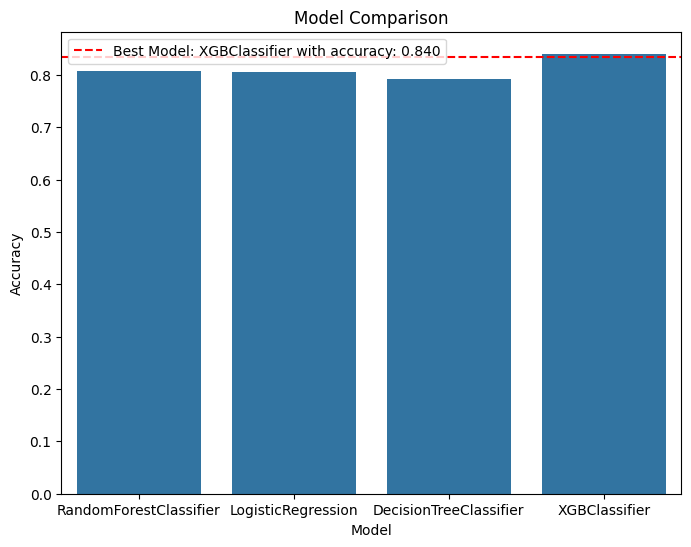

In [52]:
# Compare the models
best_model = max(results, key=lambda x: x[1])
print(f"Best model: {best_model[0]} with accuracy: {best_model[1]:.3f}")

# Train and evaluate the best model on the test set
best_model_obj = models[results.index(best_model)]
best_model_obj.fit(x_churn_train, y_churn_train)
y_pred_test = best_model_obj.predict(x_churn_test)
print(f"\nBest model test metrics:")
print(f"Accuracy: {accuracy_score(y_churn_test, y_pred_test):.3f}")
print(f"Classification Report:\n{classification_report(y_churn_test, y_pred_test)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_churn_test, y_pred_test)}\n")

# Bar chart for accuracy
model_names = [result[0] for result in results]
accuracies = [result[1] for result in results]

plt.figure(figsize=(8,6))
sns.barplot(x=model_names, y=accuracies)
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Best Model: {best_model[0]} with accuracy: {best_model[1]:.3f}')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [61]:
xgb = XGBClassifier(n_estimators=100, max_depth=5)
xgb.fit(x_churn_train, y_churn_train)

# Retrieve the coefficients
# Show as a nice dataframe

data = feature_churn_train
model = xgb

coef_df = pd.DataFrame({
    'feature': feature_churn_train.columns,
    'importance': model.feature_importances_
})

coef_df = coef_df.sort_values(by='importance', ascending=True)
coef_df

,feature,importance
15,PaperlessBilling,0.010040
18,TotalCharges,0.014074
12,StreamingTV,0.016750
16,PaymentMethod,0.018443
1,SeniorCitizen,0.018749
0,gender,0.019291
17,MonthlyCharges,0.019869
13,StreamingMovies,0.020131
4,tenure,0.020816
6,MultipleLines,0.027226


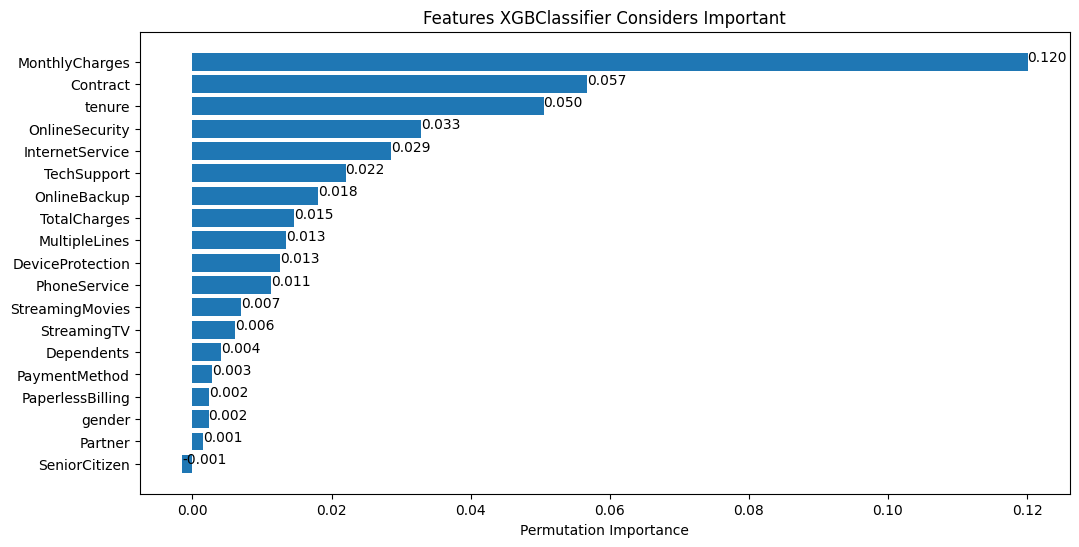

In [60]:
# Initialize and fit a XGBClassifier
final_xgb = XGBClassifier(n_estimators=100, max_depth=5)
final_xgb.fit(x_churn_train, y_churn_train)

plt.figure(figsize=(12, 6))

# Calculate permutation importance
perm_importance = permutation_importance(final_xgb, feature_churn_test, target_churn_test)

feature_names = feature_churn_train.columns
features = np.array(feature_names)

# Sort features by their permutation importance
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title('Features XGBClassifier Considers Important')
plt.xlabel("Permutation Importance")

# Add data labels
for index, value in enumerate(perm_importance.importances_mean[sorted_idx]):
    plt.text(value, index, f'{value:.3f}')

plt.show()

In [ ]:
    new_df.to_csv('telco_customer.csv', index=False)